In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [12]:
#relationship analysis
corelation=df.corr()

<AxesSubplot:>

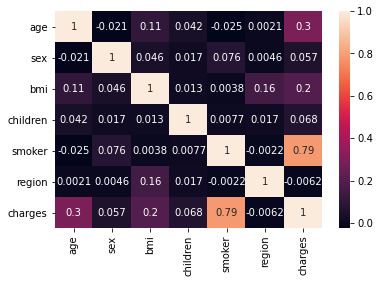

In [13]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

The smoker and the charges are highly correlated

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

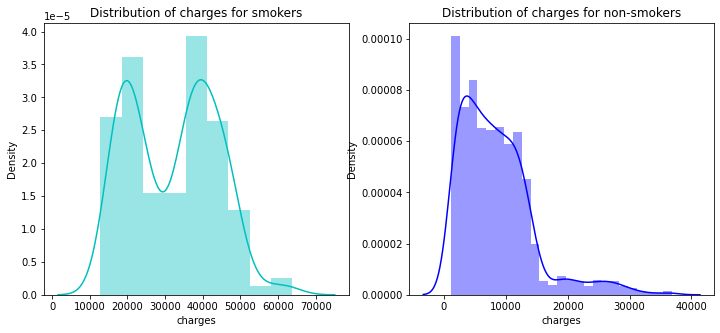

In [20]:

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment

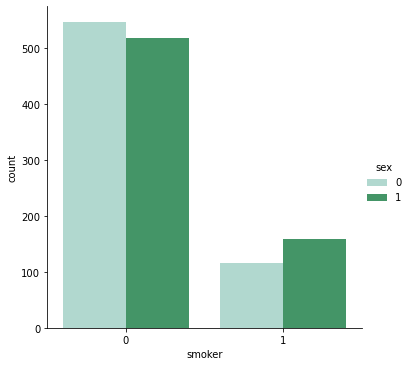

In [24]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="BuGn", data=df)

Note that women are coded with the symbol "0 "and men - "1". Thus non-smoking people -"0"and "1" rep a smoker. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking.

# 3.visualizing the age distribution

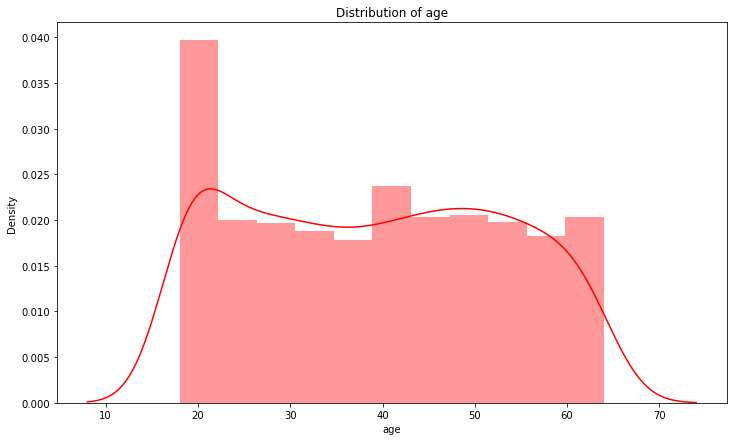

In [27]:
plt.figure(figsize=(12,7))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'r')

The minimum age is 18 years and the maximum age is 64 years.

In [11]:
#4.isolating continuous columns
numerical_continuous=df[['age','bmi','charges']]
numerical_continuous.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [12]:
#isolating discrete columns 
numerical_discrete=df[['children']]
numerical_discrete.head()

,children
0,0
1,1
2,3
3,0
4,0


Text(0, 0.5, 'count')

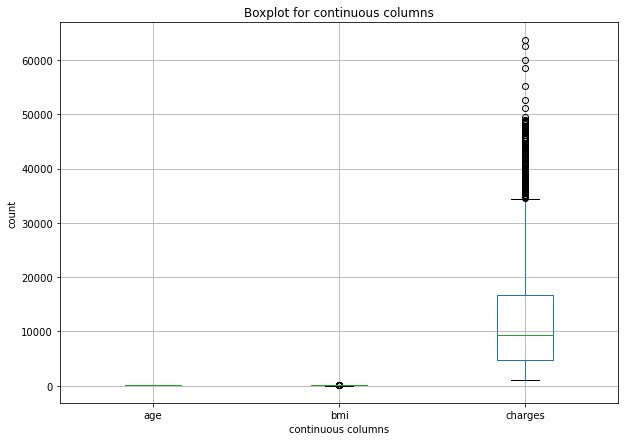

In [13]:
#5.identifying outliers using box plot
plt.figure(figsize = (10,7))
numerical_continuous.boxplot()
plt.title("Boxplot for continuous columns")
plt.xlabel('continuous columns')
plt.ylabel('count')

In [14]:
#using Z-score function defined in scipy library to detect the outliers
from scipy import stats
z = np.abs(stats.zscore(numerical_continuous))
print(z)

[[1.43876426 0.45332    0.2985838 ]
 [1.50996545 0.5096211  0.95368917]
 [0.79795355 0.38330685 0.72867467]
 ...
 [1.50996545 1.0148781  0.96159623]
 [1.29636188 0.79781341 0.93036151]
 [1.55168573 0.26138796 1.31105347]]


In [15]:
#defining a threshold to identify an outlier
threshold = 3
print(np.where(z > 3))

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
      dtype=int64), array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int64))


In [17]:
#checking outliers
print(z[34][2])

3.132806075214621


In [18]:
#correcting or resolving outlier using Z score test
numerical_continuous1= numerical_continuous[(z < 3).all(axis=1)]

In [19]:
 numerical_continuous1.shape

(1327, 3)

In [20]:
numerical_continuous.shape

(1338, 3)

above code removed 11 rows from the dataset which were outliers

Text(0, 0.5, 'count')

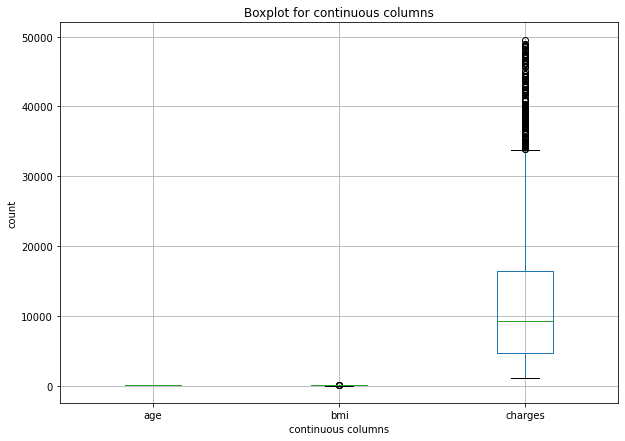

In [21]:
#6. visualizing if the outliers have been resolved
plt.figure(figsize = (10,7))
numerical_continuous1.boxplot()
plt.title("Boxplot for continuous columns")
plt.xlabel('continuous columns')
plt.ylabel('count')

In [23]:
#7. isolating categorical columns 
categorical=df[['sex','smoker','region']]
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


<AxesSubplot:title={'center':'Box plot for charges against sex '}, xlabel='charges', ylabel='sex'>

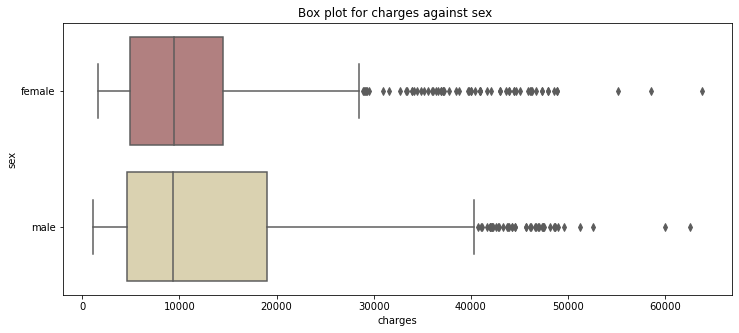

In [33]:
#8.detecting outliers for categorical columns 
plt.figure(figsize=(12,5))
plt.title("Box plot for charges against sex ")
sns.boxplot(y="sex", x="charges", data = df , orient="h", palette = 'pink')

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Box plot for charges against smoker'}, xlabel='charges', ylabel='smoker'>

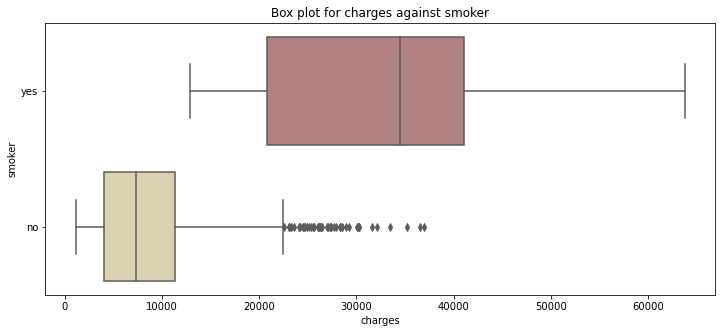

In [6]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges against smoker")
sns.boxplot(y="smoker", x="charges", data = df , orient="h", palette = 'pink')

<AxesSubplot:title={'center':'Box plot for charges against region'}, xlabel='charges', ylabel='region'>

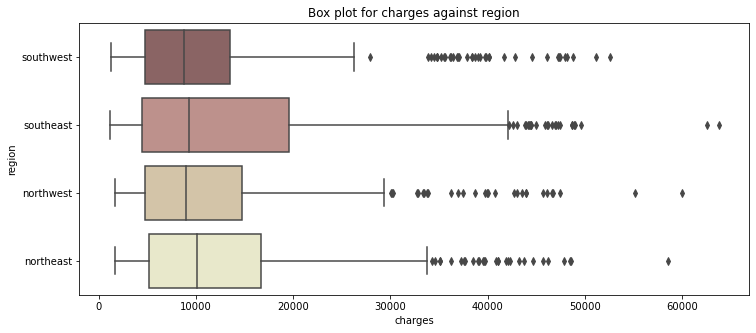

In [7]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges against region")
sns.boxplot(y="region", x="charges", data = df , orient="h", palette = 'pink')

In [8]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64